## Introduction

This notebook will attempt to analyze high school student's performance in math, reading, and writing. The dataset comes from http://roycekimmons.com/tools/generated_data/exams, and contains the performance data of 1000 students from a public school. In addition, it also contains information regarding their background such as gender, race, lunch plan, whether or not they completed a test preparation course, and their parent's level of education.

The notebook will take a look at each factor to see if they play a significant role in a student's academic success in those subjects. In addition, please note that the data used is fictional, so the findings have no significant meaning.

Advice and suggestions for improvement would also be greatly appreciated.

## Factors to look at

Factors and questions that the notebook will be looking at are:

1. Do students on average score significantly better at a certain subject?
2. Do students with a certain gender typically score better on certain subjects than their counterpart?
3. Do students of a certain race score better than others?
4. On average, does completing a test preparation course increase a student's score?
5. If test prep helps, is the group that has the best score also the group that has the highest test preparation course?
6. What about whether or not the parents have a degree?
7. Do low income students (defined by whether or not they are on a lunch plan) score worse?
8. How many students on a lunch plan complete a test preparation course (assuming that the test preparation course costs money)?
9. Will it be possible to predict the range of a student's score using Machine Learning?

In [68]:
# Import the libraries that will be used
import numpy as np
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [69]:
# Read the file and put it into a dataframe
data = pd.read_csv("StudentsPerformance.csv")

In [70]:
# Get a general overview of the data
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [72]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


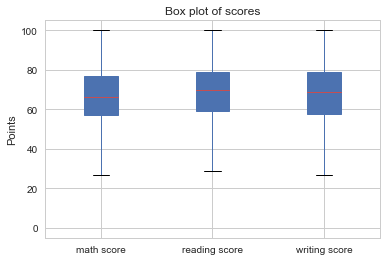

In [73]:
# Quick box plot of the data
boxplot = data.boxplot(patch_artist=True)
plt.title("Box plot of scores")
plt.ylabel("Points")

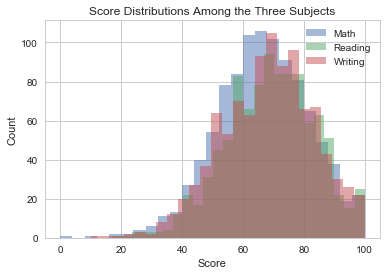

In [74]:
# Histogram of the scores for the three subjects
plt.hist("math score", data=data, alpha=0.5, bins=25)
plt.hist("reading score", data=data, alpha=0.5, bins=25)
plt.hist("writing score", data=data, alpha=0.5, bins=25)
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Score Distributions Among the Three Subjects")
plt.legend(["Math", "Reading", "Writing"])

In [75]:
# Add a column for the cumulative score
data["Cumulative Score"] = data["math score"] + data["reading score"] + data["writing score"]
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Cumulative Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


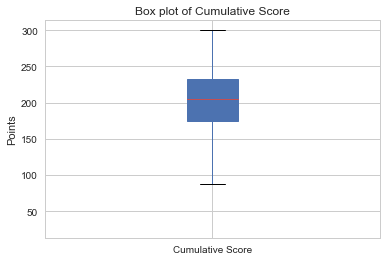

In [76]:
# Boxplot of the cumulative score
data.boxplot("Cumulative Score", patch_artist=True)
plt.title("Box plot of Cumulative Score")
plt.ylabel("Points")

In [77]:
# Find the mean and standard deviation of the cumulative score
print("Mean: %.2f \nStd: %.2f" %(data["Cumulative Score"].mean(), data["Cumulative Score"].std()))

Mean: 203.31 
Std: 42.77


## Quick Glance

From a quick glance at the data, there are no null values that will need to be accounted for, and students generally score the highest in the reading section with the math section being the lowest. However, all of the subjects score roughly the same at around the 60-80 range, and the score distribution forms a bell curve like shape. When looking at cumulative scores, the standard deviation is much higher and a student's score can range from around 150-250 on average. The mean for the cumulative scores are around 203.31 with a standard deviation of around 42.77.

Some points that would be interesting to see are if this holds true for all genders, races, etc.

In [78]:
# Create a function to quickly group the data by a certain field and returns the mean scores
# In addition, it plots a histogram of the mean math, reading, writing, and cumulative scores
# Inputs are the dataframe, the groupby field, and a colorset
def group_scores(df, groupby_field, **colors):
    df = df[[groupby_field, "math score", "reading score", "writing score", "Cumulative Score"]].groupby(groupby_field)
    df = DataFrame(np.transpose(df.mean()))
    df.index = ["Math", "Reading", "Writing", "Cumulative"]

    if colors.get("color"):
        df.plot(kind="bar", rot=0, color=colors.get("color"))
    else:
        df.plot(kind="bar", rot=0, cmap=colors.get("color"))

    plt.title("Mean scores based on " + groupby_field)
    plt.ylabel("Mean Scores")
    plt.legend(loc="upper center")
    return df

## Analysis Based on Gender

In [79]:
# Making sure that there is enough data for both genders
data["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

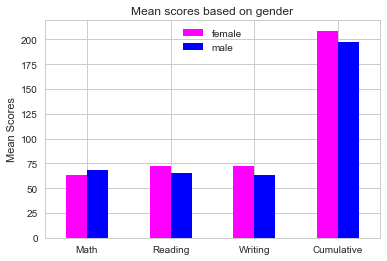

In [80]:
# Create the plot using the function
gender_scores = group_scores(data, "gender", color=["magenta", "blue"])

In [81]:
# Print the mean scores for each section
gender_scores

gender,female,male
Math,63.633205,68.728216
Reading,72.608108,65.473029
Writing,72.467181,63.311203
Cumulative,208.708494,197.512448


From the results, males scored better on average than their female counterparts in the math section. However, in the reading and writing section, females scored better than males. Males on average being stronger in math may be one of the reasons why there are typically males in STEM fields.

Overall, females score higher than males by around ~11 points.

## Analysis Based on Race

In [82]:
# Check the counts for the race ot make sure there is a good distribution in the data
data["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

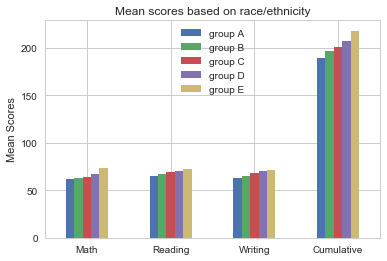

In [83]:
# Plot
race_scores = group_scores(data, "race/ethnicity", cmap="set1")

In [84]:
# Print the mean scores in table format
race_scores

race/ethnicity,group A,group B,group C,group D,group E
Math,61.629213,63.452632,64.463950,67.362595,73.821429
Reading,64.674157,67.352632,69.103448,70.030534,73.028571
Writing,62.674157,65.600000,67.827586,70.145038,71.407143
Cumulative,188.977528,196.405263,201.394984,207.538168,218.257143


On average, it seems that group E scores the highest on all three subjects and group A scores the lowest. Perhaps this is because group E has a larger percentage of people that took a test perparation course. 

It will be interesting to see later on if the students that completed the test preparation course have higher scores, and whether or not group E has the highest percentage of students that completed the course.

## Analysis Based on Completion of Test Preparation Course

In [85]:
# Check the counts
data["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

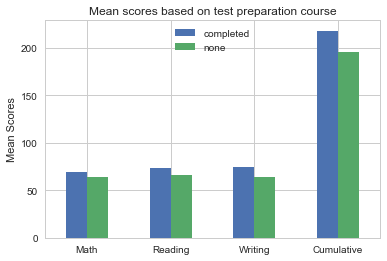

In [86]:
# Plot
test_prep_scores = group_scores(data, "test preparation course", cmap="set1")

In [87]:
# Print
test_prep_scores

test preparation course,completed,none
Math,69.695531,64.077882
Reading,73.893855,66.534268
Writing,74.418994,64.504673
Cumulative,218.008380,195.116822


It seems that students that completed the test preparation course score higher than those that did not. This makes sense since those students are expected to learn more and have more experience in solving related problems. It may also be the case that students that completed the course studied more than those that did not. The data also shows that the test preparation course is working as intended, and may not necessarily be a waste of money.

## Percentage of Students per Group That Completed a Test Preparation Course

In [88]:
# Group by race and test prep course
group_race_test_counts = data[["race/ethnicity", "test preparation course"]].groupby(["race/ethnicity", "test preparation course"])

In [89]:
# Get the counts using size() and make it into a dataframe
group_race_test_counts = DataFrame(group_race_test_counts.size().reset_index(name="Counts")).set_index("race/ethnicity")

In [90]:
# Get total number of students in each race that completed test prep
group_race_test_sums = group_race_test_counts.groupby(group_race_test_counts.index).sum()

In [91]:
# Rename column
group_race_test_sums.columns = ["Total Num"]

In [92]:
# Join the data
group_race_test = pd.concat([group_race_test_counts, group_race_test_sums], axis=1, join="inner")

In [93]:
# Create a new column for the percentage of students
group_race_test["Percentage"] = np.round(group_race_test["Counts"]/group_race_test["Total Num"], 2)

In [94]:
# Print out the percentages for each group that completed the test prep score
group_race_test[group_race_test["test preparation course"] == "completed"]

,test preparation course,Counts,Total Num,Percentage
race/ethnicity,,,,
group A,completed,31,89,0.35
group B,completed,68,190,0.36
group C,completed,117,319,0.37
group D,completed,82,262,0.31
group E,completed,60,140,0.43


When analyzing the races, group E scored the highest in all subjects. In addition, when comparing the students that completed a test preparation course with those that did not, it was shown that test preparation courses helped improve scores on average.

Looking at the percentage of students from each group that completed the test preparation score, group E had the highest percentage of students that completed the course. This may be the one reason why group E scored the highest out of all the groups.

Surprisingly, group D had the lowest percentage of completion yet they scored the second highest out of all the groups in all subjects. This may be due to group D studying a significant amount more than group A, B, and C despite having a lower percentage of students that completed the test preparation course.

## Analysis on Parent's Educational Background and Student Scores

In [95]:
# Counts
data["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

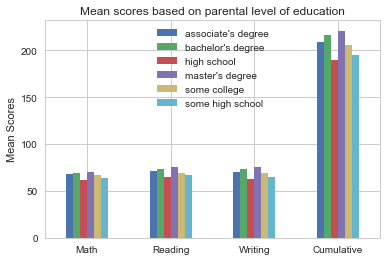

In [96]:
# Plot
parent_ed_scores = group_scores(data, "parental level of education", cmap="set1")

In [97]:
# Print
parent_ed_scores

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
Math,67.882883,69.389831,62.137755,69.745763,67.128319,63.497207
Reading,70.927928,73.000000,64.704082,75.372881,69.460177,66.938547
Writing,69.896396,73.381356,62.448980,75.677966,68.840708,64.888268
Cumulative,208.707207,215.771186,189.290816,220.796610,205.429204,195.324022


It looks like if the parents have some sort of degree, the student will score higher on average than those whose parents do not have a degree. Surprisingly, children of parents that did not finish high school scored better than the children whose parents actually completed high school. Perhaps this is due to those parents realizing the drawbacks of not having a high school diploma and emphasizing the importance of an education to their children.

To make the divide between scores from children whose parents have a degree and not, a new yes/no column will be added to show whether or not the parent has a degree.

In [98]:
# If the parental level of education column contains "degree", set the value to yes
data["Degree"] = data["parental level of education"].apply(
    lambda x: "yes" if x.find("degree") >= 0 else "no")

In [99]:
# View result
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Cumulative Score,Degree
0,female,group B,bachelor's degree,standard,none,72,72,74,218,yes
1,female,group C,some college,standard,completed,69,90,88,247,no
2,female,group B,master's degree,standard,none,90,95,93,278,yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,yes
4,male,group C,some college,standard,none,76,78,75,229,no


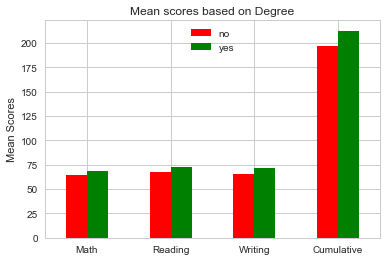

In [100]:
# Plot again
parent_degree_scores = group_scores(data, "Degree", color=["red", "green"])

In [101]:
# View the numbers
parent_degree_scores

Degree,no,yes
Math,64.419301,68.604010
Reading,67.158070,72.197995
Writing,65.579035,71.781955
Cumulative,197.156406,212.583960


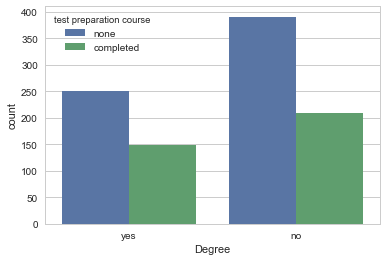

In [102]:
# A quick plot to see if children whose parents have a degree complete test preparation courses 
sns.countplot("Degree", data=data, hue="test preparation course")

From the data, children whose parents have a degree score better across all three subjects resulting in a mean cumulative difference of around 15 points. This may be due to the parents with degrees valuing education higher than those without and are more willing to help their children out. On the other hand, parents without a degree may have some sort of work that do not require an advanced education. From the data, children whose parents have a degree score better across all three subjects resulting in a mean cumulative difference of around 15 points.

The countplot of children whose parents have a degree attempts to see if children have a higher percentage to complete the test preparation course if their parents have a degree. This information can potentially show that parents with a degree have a higher likelihood to make their children complete the test preparation course if the discrepancy is large enough. The following section will be taking a look at the exact percentages and seeing if this is the case.

## Percentage of Students with Parents Having a Degree That Completed a Test Preparation Course


In [103]:
# Group relevant data
group_degree_test_counts = data[["Degree", "test preparation course"]].groupby(["Degree", "test preparation course"])

In [104]:
# Get the counts using size() and make it into a dataframe
group_degree_test_counts = DataFrame(group_degree_test_counts.size().reset_index(name="Counts")).set_index("Degree")

In [105]:
# Get total number of students in each degree group
group_degree_test_sums = group_degree_test_counts.groupby(group_degree_test_counts.index).sum()

In [106]:
# Rename column
group_degree_test_sums.columns = ["Total Num"]

In [107]:
# Join the data
group_degree_test = pd.concat([group_degree_test_counts, group_degree_test_sums], axis=1, join="inner")

In [108]:
# View the data
group_degree_test

,test preparation course,Counts,Total Num
Degree,,,
no,completed,210,601
no,none,391,601
yes,completed,148,399
yes,none,251,399


In [109]:
# Create a new column for the percentage of students
group_degree_test["Percentage"] = np.round(group_degree_test["Counts"]/group_degree_test["Total Num"], 2)

In [110]:
# Print out the percentages
group_degree_test[group_degree_test["test preparation course"] == "completed"]

,test preparation course,Counts,Total Num,Percentage
Degree,,,,
no,completed,210,601,0.35
yes,completed,148,399,0.37


A more granular look at the percentages of students that completed the test preparation course shows that roughly the same percentage of students complete the test preparation course regardless of whether or not the parents have a degree or not.

Therefore, it is not the case that those students are scoring better because the parents are making them complete the test preparation course. However, it can still be a case that those parents are helping the students more outside of the classroom and/or trying to teach their children about the benefits of education.

## Analysis on Lunch Plan (Income) and Student Scores

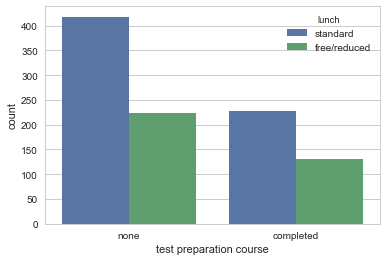

In [111]:
# Checking to see students with free/reduced lunch complete the test preparation course
sns.countplot("test preparation course", data=data, hue="lunch")

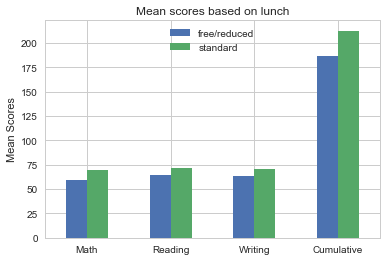

In [112]:
# Plot
lunch_scores = group_scores(data, "lunch", cmap="set1")

In [113]:
lunch_scores

lunch,free/reduced,standard
Math,58.921127,70.034109
Reading,64.653521,71.654264
Writing,63.022535,70.823256
Cumulative,186.597183,212.511628


It seems that students on a standard lunch plan score higher than students on a reduced lunch plan on average. Surprisingly, there are still students on a reduced lunch that complete the test preparation course, so it may be the case that the test preparation course does not cost money.

As to why the students on a standard lunch plan score higher, it may be due to those students having more resources to exceed. For example, they may not have worries such as making sure they have enough to eat, taking tests while hungry, etc. In addition, some may even have private tutors or some sort of afterschool class to help them improve their scores. In contrast, students on a free/reduced lunch plan may not have the funds to access those resources, and may even be in a worse physical condition than those on a standard lunch plan when taking the tests.

## Machine Learning to Predict Scores

In [114]:
# Function to convert the binary categorical fields to 1s and 0s
def convert_binary_categorical(df, key_val_dict):
    df = df.copy()
    for key in key_val_dict:
        df[key] = df[key].apply(lambda x: 1 if x == key_val_dict[key] else 0)
    return df

In [115]:
# Mapping the gender, test prep, race, degree as 1
mapping_dict = {"gender": "male", "Degree": "yes", "test preparation course": "completed"}

In [116]:
# Create the dataframe for the binary categorical fields and convert
data_binary_x = data[["gender", "Degree", "test preparation course"]]
data_binary_x = convert_binary_categorical(data_binary_x, mapping_dict)

In [117]:
# Check results
data_binary_x.head()

,gender,Degree,test preparation course
0,0,1,0
1,0,0,1
2,0,1,0
3,1,1,0
4,1,0,0


In [118]:
# Create dummies for the non binary categorical field
data_non_binary_x = pd.get_dummies(data["race/ethnicity"])

In [119]:
# Drop a field to prevent over fitting and view
data_non_binary_x.drop("group E", axis=1, inplace=True)
data_non_binary_x.head()

,group A,group B,group C,group D
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0


In [120]:
# Combine the binary and nonbinary dataframes to get the X data
data_x = pd.concat([data_binary_x, data_non_binary_x], axis=1)

In [121]:
# View
data_x.head()

,gender,Degree,test preparation course,group A,group B,group C,group D
0,0,1,0,0,1,0,0
1,0,0,1,0,0,1,0
2,0,1,0,0,1,0,0
3,1,1,0,1,0,0,0
4,1,0,0,0,0,1,0


In [122]:
# Generate the Y target
data_y_math = data["math score"]
data_y_reading = data["reading score"]
data_y_writing = data["writing score"]

In [123]:
# Split the x and y into training and testing datasets
x_train_math, x_test_math, y_train_math, y_test_math = train_test_split(data_x, data_y_math)
x_train_reading, x_test_reading, y_train_reading, y_test_reading = train_test_split(data_x, data_y_reading)
x_train_writing, x_test_writing, y_train_writing, y_test_writing = train_test_split(data_x, data_y_writing)

In [124]:
# Predict the probability of each score occuring
clf_math = LogisticRegression()
clf_math.fit(x_train_math, y_train_math)
y_pred_math = clf_math.predict_proba(x_test_math)

In [125]:
# Probability of each score occuring for each row
y_pred_math

array([[ 0.00432617,  0.00278183,  0.00278183, ...,  0.00560908,
         0.00417418,  0.00371369],
       [ 0.00233386,  0.00234473,  0.00234473, ...,  0.00469266,
         0.00576759,  0.01122897],
       [ 0.00181963,  0.00299194,  0.00299194, ...,  0.0036392 ,
         0.00432794,  0.00476114],
       ..., 
       [ 0.00241339,  0.00154735,  0.00154735, ...,  0.00474551,
         0.00361901,  0.00383321],
       [ 0.00256616,  0.00166107,  0.00166107, ...,  0.00319202,
         0.00243018,  0.00654133],
       [ 0.00082923,  0.00083725,  0.00083725, ...,  0.00232427,
         0.00178637,  0.00566638]])

In [126]:
# Group the math, reading, and writing score into bins to view easier
# 0, 1, 2, 3, 4, 5 corresponds to [0-20), [20-40), [40-60)...
data_y_math = np.floor(data_y_math/20)
data_y_reading = np.floor(data_y_reading/20)
data_y_writing = np.floor(data_y_writing/20)

In [127]:
# Checking
[data_y_math.unique(), data_y_reading.unique(), data_y_writing.unique()]

[array([ 3.,  4.,  2.,  1.,  0.,  5.]),
 array([ 3.,  4.,  2.,  1.,  0.,  5.]),
 array([ 3.,  4.,  2.,  1.,  0.,  5.])]

In [128]:
# Split into training and testing datasets using the new y data
x_train_math, x_test_math, y_train_math, y_test_math = train_test_split(data_x, data_y_math, random_state=42)
x_train_reading, x_test_reading, y_train_reading, y_test_reading = train_test_split(data_x, data_y_reading)
x_train_writing, x_test_writing, y_train_writing, y_test_writing = train_test_split(data_x, data_y_writing)

In [129]:
# Predict the bin given the gender, degree, test prep, and group
clf_math = LogisticRegression()
clf_math.fit(x_train_math, y_train_math)
y_pred_math = clf_math.predict(x_test_math)

clf_reading = LogisticRegression()
clf_reading.fit(x_train_reading, y_train_reading)
y_pred_reading = clf_reading.predict(x_test_reading)

clf_writing = LogisticRegression()
clf_writing.fit(x_train_writing, y_train_writing)
y_pred_writing = clf_writing.predict(x_test_writing)

In [130]:
# Check the accuracy
print("Math: %.5f \nReading: %.5f \nWriting: %.5f " 
      %(accuracy_score(y_test_math, y_pred_math), accuracy_score(y_test_reading, y_pred_reading), accuracy_score(y_test_writing, y_pred_writing)))

Math: 0.48000 
Reading: 0.52400 
Writing: 0.47200 


If you just randomly guess a group, you have a 1/5 chance of getting it correct, so using Logistic Regression may be beneficial. However, since the majority of students fall in bin 3 (60-80), it is important to take into account what the accuracy of only guessing bin 3 is for each subject.

## Probabily of Guessing Correct Bin if Only Choosing Bin 3

In [131]:
# Function to calculate probability when only choosing 3
def calc_percentage(data_array, bin_num):
    # Count of bin num in the array/count of all the bins in the array
    return (data_array == bin_num).sum()/len(data_array) # data_array == bin_num returns True/False and sum will sum the trues

In [132]:
# Print accuracy of only guessing 3
print("Math: %.5f \nReading: %.5f \nWriting: %.5f " 
      %(calc_percentage(y_test_math, 3), calc_percentage(y_test_reading, 3), calc_percentage(y_test_writing, 3)))

Math: 0.47600 
Reading: 0.53200 
Writing: 0.53600 


Using a logistic regression will perform slightly better than if you were to just guess bin 3 for each student. However, it is not too noticeable a difference, and it is likely that regardless of a student's background, they will score roughly within the same 60-80 range.

## Summary
There are many factors that seem to affect a students performance. For example, on average, a student is expected to do better if they take a test preparation course, if they are on a standard lunch plan, and if their parents have a degree. In addition, the average male performed better than the average female in the math section while the females outperformed the males in the reading and writing sections.

As for using machine learning to predict scores, the Logistic Regression model was used, and it performed slightly better than just picking the most frequent bin (bin 3). However, bin 3 encompasses a signficant range of scores from D- to almost B- (60-80). Therefore, since the accuracy score only slightly increased, and the score range that the model predicts is significantly wide, the results of the logistic regression model used in this study may not be too useful.